<a href="https://colab.research.google.com/github/Keanugee/mypackage/blob/master/Keanu_Gertse_Zindi_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import re
import unicodedata
# from emoji.unicode_codes import UNICODE_EMOJI
# import emoji
import nltk
import xgboost
from sklearn.svm import SVC

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/Kaggle Hackathon/training.csv')
test = pd.read_csv('/content/gdrive/My Drive/Kaggle Hackathon/test.csv')

In [0]:
test_id = test['TransactionId']

In [4]:
test_id.shape

(45019,)

In [0]:
train['TransactionStartTime'] = train['TransactionStartTime'].apply(str)
test['TransactionStartTime'] = test['TransactionStartTime'].apply(str)

In [0]:
train['TransactionStartTime'] = train['TransactionStartTime'].str.replace(r'[a-zA-Z]', ' ')
test['TransactionStartTime'] = test['TransactionStartTime'].str.replace(r'[a-zA-Z]', ' ')

In [0]:
train['Time'] = train.TransactionStartTime.apply(lambda x: x[11:19])
test['Time'] = test.TransactionStartTime.apply(lambda x: x[11:19])

In [0]:
train['seconds'] = pd.to_timedelta(train['Time']).dt.seconds
test['seconds'] = pd.to_timedelta(test['Time']).dt.seconds

In [0]:
# train['diff_seconds'] = train['seconds'].diff()

In [0]:
# for i in range(train.shape[0]):
#   train['diff_seconds'][i+1] = train['seconds'][i+1] - train['seconds'][i]

In [0]:
# train = train.drop('diff_seconds', axis = 1)

In [0]:
# train[train['FraudResult'] == 1]['ChannelId'].unique()

193

In [0]:
# train['diff_seconds'] = 0

In [0]:
# for i in range(df.shape[0] - 1):
#     df['time_diff'][i+1] = (datetime.datetime.min +  (df['concant_time'][i+1] - df['concant_time'][i])).time()

# # .time() gets the time from datetime object, if you need both days and hours, simply use this line instead:
# df['time_diff'][i+1] = df['concant_time'][i+1] - df['concant_time'][i]

In [9]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Time,seconds
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49,2,0,02:18:49,8329
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08,2,0,02:19:08,8348
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21,2,0,02:44:21,9861
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55,2,0,03:32:55,12775
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21,2,0,03:34:21,12861


In [10]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,Time,seconds
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13 10:01:40,4,10:01:40,36100
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13 10:02:12,2,10:02:12,36132
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 10:02:30,2,10:02:30,36150
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13 10:02:38,4,10:02:38,36158
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13 10:02:58,2,10:02:58,36178


In [0]:
train = train.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ChannelId', 'TransactionStartTime', 'Amount', 'Time', 'ProductId', 'CurrencyCode', 'CountryCode',  ], axis = 1)

In [0]:
train = train.drop('CountryCode', axis = 1)

In [0]:
test = test.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId','ChannelId', 'TransactionStartTime', 'Amount', 'Time', 'ProductId', 'CurrencyCode', 'CountryCode'], axis = 1)

In [0]:
test = test.drop('CountryCode', axis = 1)

Standardising the data in the train and test data set 

In [0]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train['scaled_amount'] = rob_scaler.fit_transform(train['Value'].values.reshape(-1,1))
# train['scaled_seconds'] = rob_scaler.fit_transform(train['seconds'].values.reshape(-1,1))

train.drop(['Value'], axis=1, inplace=True)

In [0]:
scaled_amount = train['scaled_amount']
# scaled_time = train['scaled_seconds']

train.drop('scaled_amount', axis=1, inplace=True)
train.insert(0, 'scaled_amount', scaled_amount)
# train.insert(1, 'scaled_seconds', scaled_time)


In [0]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

test['scaled_amount'] = rob_scaler.fit_transform(test['Value'].values.reshape(-1,1))
# test['scaled_seconds'] = rob_scaler.fit_transform(test['seconds'].values.reshape(-1,1))

test.drop(['Value'], axis=1, inplace=True)

In [0]:
scaled_amount = test['scaled_amount']
# scaled_time = test['scaled_seconds']

test.drop(['scaled_amount'], axis=1, inplace=True)
test.insert(0, 'scaled_amount', scaled_amount)
# test.insert(1, 'scaled_seconds', scaled_time)

In [541]:
train.head()

,scaled_amount,ProviderId,ProductCategory,PricingStrategy,FraudResult
0,0.000000,ProviderId_6,airtime,2,0
1,-0.207407,ProviderId_4,financial_services,2,0
2,-0.105820,ProviderId_6,airtime,2,0
3,4.402116,ProviderId_1,utility_bill,2,0
4,-0.075344,ProviderId_4,financial_services,2,0


In [588]:
test.head()

,ProviderId,ProductCategory,Value,PricingStrategy,seconds
0,ProviderId_5,airtime,1000,4,36100
1,ProviderId_5,financial_services,2000,2,36132
2,ProviderId_4,financial_services,50,2,36150
3,ProviderId_5,airtime,3000,4,36158
4,ProviderId_4,financial_services,60,2,36178


Creating dummy variables

In [0]:
train = pd.get_dummies(train, columns=['ProductCategory', 'ProviderId', 'PricingStrategy'], drop_first=True)

In [0]:
test = pd.get_dummies(test, columns=['ProductCategory', 'ProviderId', 'PricingStrategy'], drop_first=True)

Checking the correlation between variables

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: FraudResult, dtype: float64


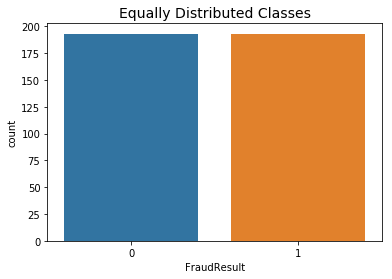

In [0]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['FraudResult'].value_counts()/len(new_df))



sns.countplot('FraudResult', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [0]:
len(train[train['FraudResult'] == 1])

193

In [0]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train = train.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_train = train.loc[train['FraudResult'] == 1]
non_fraud_train = train.loc[train['FraudResult'] == 0][:193]

normal_distributed_df = pd.concat([fraud_train, non_fraud_train])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.

,scaled_amount,scaled_seconds,FraudResult,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
77461,-0.357895,0.322606,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
24024,0.280702,-0.100906,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
95264,175.087719,1.037052,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
94261,0.000000,-0.929982,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
13142,701.403509,0.909140,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


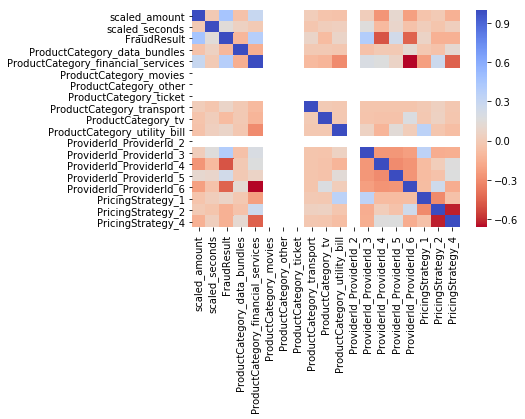

In [0]:
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

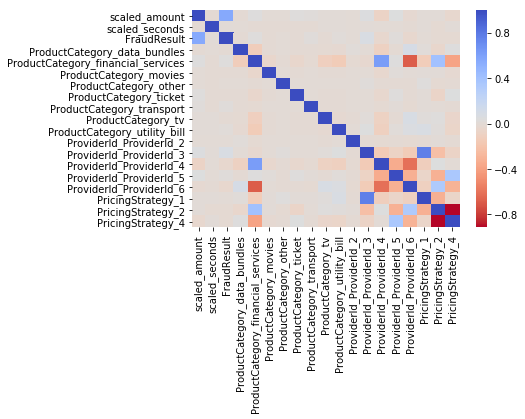

In [0]:
sub_sample_corr = train.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train

In [0]:
train[train['FraudResult'] == 1].count()

ProviderId         193
ProductId          193
ProductCategory    193
Amount             193
PricingStrategy    193
FraudResult        193
dtype: int64

In [15]:
test.head()

,Value,seconds,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,1000,36100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2000,36132,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,50,36150,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3000,36158,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,60,36178,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [16]:
train.head()

,Value,FraudResult,seconds,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,1000,0,8329,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,20,0,8348,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,500,0,9861,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,21800,0,12775,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,644,0,12861,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


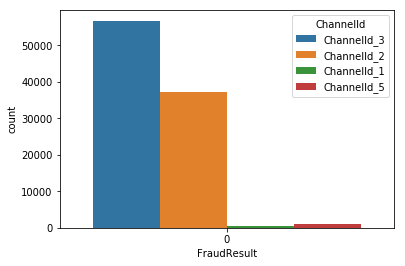

In [0]:
sns.countplot('FraudResult', hue = 'ChannelId', data = new)

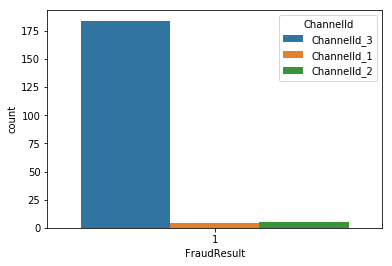

In [0]:
sns.countplot('FraudResult', hue = 'ChannelId', data = new)

In [0]:
# train['CustomerId'] = train['CustomerId'].str.replace(r'[a-zA-Z]', '')
# train['ProviderId'] = train['ProviderId'].str.replace(r'[a-zA-Z]', '')
# train['ProductId'] = train['ProductId'].str.replace(r'[a-zA-Z]', '')


In [0]:
test['ProviderId'] = test['ProviderId'].str.replace(r'[a-zA-Z]', '')
test['ProductId'] = test['ProductId'].str.replace(r'[a-zA-Z]', '')

In [0]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [0]:
# train['CustomerId'] = train['CustomerId'].apply(remove_punctuations)
train['ProviderId'] = train['ProviderId'].apply(remove_punctuations)
train['ProductId'] = train['ProductId'].apply(remove_punctuations)

In [0]:
test['ProviderId'] = test['ProviderId'].apply(remove_punctuations)
test['ProductId'] = test['ProductId'].apply(remove_punctuations)

In [0]:
Fraud = train[train['FraudResult'] == 1]

In [0]:
test = test.drop('ProductId', axis = 1)
train = train.drop('ProductId', axis = 1)

In [425]:
train.head()

,scaled_amount,scaled_seconds,FraudResult,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,0.000000,-1.320052,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,-0.357895,-1.319405,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.175439,-1.267879,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,6.666667,-1.168642,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,-0.576842,-1.165713,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [426]:
train.columns

Index(['scaled_amount', 'scaled_seconds', 'FraudResult',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill',
       'ProviderId_ProviderId_2', 'ProviderId_ProviderId_3',
       'ProviderId_ProviderId_4', 'ProviderId_ProviderId_5',
       'ProviderId_ProviderId_6', 'PricingStrategy_1', 'PricingStrategy_2',
       'PricingStrategy_4'],
      dtype='object')

In [427]:
test.columns

Index(['scaled_amount', 'scaled_seconds', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_retail', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'PricingStrategy_1', 'PricingStrategy_2', 'PricingStrategy_4'],
      dtype='object')

In [0]:
X = train.drop('FraudResult', axis = 1)
y = train['FraudResult']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 11)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
model = Pipeline([('model', RandomForestClassifier(n_estimators= 100))])

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [55]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [0]:
predictions = model.predict(test)

In [0]:
training = model.predict(X_train)
testing = model.predict(X_test)

In [0]:
from sklearn import metrics

In [58]:
print(metrics.f1_score(y_train, training))
print(metrics.f1_score(y_test, testing))

0.9968652037617556
0.8533333333333334


In [577]:
print(metrics.f1_score(y_train, training))
print(metrics.f1_score(y_test, testing))

0.8927335640138409
0.923076923076923


In [553]:
print(metrics.classification_report(y_test, testing))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19099
           1       0.84      0.94      0.89        34

    accuracy                           1.00     19133
   macro avg       0.92      0.97      0.94     19133
weighted avg       1.00      1.00      1.00     19133



In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE(random_state=27, ratio=1.0)

In [0]:
sm_X_train, sm_y_train = sm.fit_sample(X_train, y_train)

In [557]:
smote = RandomForestClassifier().fit(sm_X_train, sm_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
predictions = smote.predict(test)

In [559]:
metrics.f1_score(y_test, smote_pred)

0.6213592233009708

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(model, X, y, scoring='f1', cv = 5)

In [497]:
scores.mean()

0.8124153859788639

In [0]:
import sklearn

In [0]:
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [0]:
rf = RandomForestClassifier()


In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

In [0]:
grid_result = grid.fit(X_train, y_train)

In [0]:
grid_result.best_score_

0.999320519018934

In [0]:
grid_result.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
grid_result.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [0]:
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

In [0]:
rf = grid_result.best_estimator_

In [0]:
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

In [0]:
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   20.7s finished


In [0]:
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

In [0]:
rf = grid_result.best_estimator_

In [0]:
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

In [0]:
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


In [0]:
testing = rf.predict(X_test)

In [0]:
metrics.f1_score(y_test, testing)

0.8732394366197184

In [0]:
rf = grid_result.best_estimator_

In [0]:
cross_val_score(rf, X, y, scoring='f1', cv=5).mean()

0.8486430602525408

In [0]:
cross_val_score(model, X_train, y_train, scoring='f1', cv=5).mean()

0.8249296536796535

In [0]:
test.shape

(45019, 15)

In [0]:
X.shape

(95662, 15)

In [0]:
test['ProductCategory'].unique()

array(['airtime', 'financial_services', 'tv', 'utility_bill',
       'data_bundles', 'movies', 'ticket', 'retail', 'transport'],
      dtype=object)

In [0]:
test.shape

(45019, 15)

In [0]:
X.shape

(95662, 37)

In [0]:
test = test.drop(test[test['ProductId'] == '26'].index)

In [0]:
test[test['ProductId'] == '26'].index

Int64Index([], dtype='int64')

In [0]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
new_prediction = rf.predict(test)

In [0]:
submission = pd.DataFrame({'TransactionId': test_id, 'FraudResult': predictions})

In [65]:
submission[submission['FraudResult'] == 1].count()

TransactionId    75
FraudResult      75
dtype: int64

In [0]:
submission.to_csv('/content/gdrive/My Drive/Kaggle Hackathon/Zindi_Sub.csv', index = False)

In [0]:
submisson = pd.read_csv('/content/gdrive/My Drive/Kaggle Hackathon/Zindi_Sub.csv').head()

In [0]:
predictions = smote.predict(test)

In [0]:
test.head()

,scaled_amount,scaled_seconds,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,0.000000,-0.394024,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.198020,-0.392943,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,-0.207921,-0.392336,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.396040,-0.392066,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,-0.209901,-0.391390,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
from sklearn.utils import resample

# Separate input features and target
y = train.FraudResult
X = train.drop('FraudResult', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.FraudResult==0]
fraud = X[X.FraudResult==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [0]:
X = upsampled.drop('FraudResult', axis = 1)
y = upsampled['FraudResult']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [0]:
predictions = model.predict(test)